In [1]:
import json
import os
import glob
import pprint
from tqdm import tqdm
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/verified.dat", 
                 names=["uid", "name", "friends", "friends_count", 
                        "followers_count", "listed_count", "statuses_count", 
                        "created_at", "url", "avatar", "location"])

In [3]:
# df = df[df['friends_count'] <= 1000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335018 entries, 0 to 335017
Data columns (total 11 columns):
uid                335018 non-null int64
name               335017 non-null object
friends            335018 non-null object
friends_count      335018 non-null int64
followers_count    335018 non-null int64
listed_count       335018 non-null int64
statuses_count     335018 non-null int64
created_at         335018 non-null object
url                269170 non-null object
avatar             332540 non-null object
location           269760 non-null object
dtypes: int64(5), object(6)
memory usage: 28.1+ MB


In [4]:
df.head()

,uid,name,friends,friends_count,followers_count,listed_count,statuses_count,created_at,url,avatar,location
0,26642006,Alyssa_Milano,friends,4381,3638372,37370,59701,Thu Mar 26 00:34:20 +0000 2009,https://t.co/DOhhBYiEHZ,img/26642006.jpg,Los Angeles
1,46233559,rosemcgowan,friends,4661,890406,8280,13880,Wed Jun 10 21:39:32 +0000 2009,https://t.co/hinkEjQ5ex,img/46233559.jpg,Planet 9
2,44783853,HHSGov,friends,396,779017,8545,19885,Fri Jun 05 01:14:31 +0000 2009,https://t.co/T4j355Evo7,img/44783853.jpg,Washington D.C.
3,44409004,shakira,friends,210,51523187,99436,6301,Wed Jun 03 17:38:07 +0000 2009,https://t.co/lL3bUtNcA1,NaN,Barranquilla
4,62290422,RedHourBen,friends,625,5763578,28830,5484,Sun Aug 02 16:21:43 +0000 2009,NaN,img/62290422.jpg,Red Hour Films - Los Angeles


In [5]:
# df.info()

### Dict structure    
uid:{
    
    uid: 123,
    name: '',
    friends_count: 0,
    followers_count: 0,
    listed_count: 0,
    statuses_count: 0,
    pff: 0,
    pfr: 0,
    gcf: 0,
    gcr: 0,
    description: '',
    tweets: []

}

In [6]:
ids = list(df['uid'])


In [10]:
users = {}

# for i in ids:
    
#     users[i] = {
#         'uid': i,
#         'pff': 0,
#         'pfr': 0,
#         'gcf': 0,
#         'gcr': 0,
#         'description': '',
#         'tweets': []
#     }

In [9]:
# len(users)

335015

In [10]:
# users = users

In [12]:
files_users = glob.iglob(f"../fakenewsnet_dataset/user_profiles/*.json")

count = 0


for file in files_users:
    if count%1000 == 0:
        print(count)
#     if count == 1:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
#         print(data)
        
        if data['verified'] == False:
            users[data['id']] = {
                'uid': data['id'],
                'name': data['name'],
                'friends_count': data['friends_count'],
                'followers_count': data['followers_count'],
                'listed_count': data['listed_count'],
                'statuses_count': data['statuses_count'],
                'pff': 0,
                'pfr': 0,
                'gcf': 0,
                'gcr': 0,
                'description': data['description'],
                'tweets': []
            }
    
    count+=1
            

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [13]:
len(users)

388134

In [14]:
list_of_lists = []

for user_id in users:
    name = users[user_id]['name']
    friends_count = users[user_id]['friends_count']
    followers_count = users[user_id]['followers_count']
    listed_count = users[user_id]['listed_count']
    statuses_count = users[user_id]['statuses_count']
    description = users[user_id]['description']
    
    
    list_of_lists.append([user_id, name, friends_count, followers_count, listed_count, statuses_count
                          , description])


In [15]:
df_users = pd.DataFrame(list_of_lists, columns=["uid", 'name','friends_count','followers_count'
                                                ,'listed_count', 'statuses_count', 'description'])

In [16]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388134 entries, 0 to 388133
Data columns (total 7 columns):
uid                388134 non-null int64
name               388134 non-null object
friends_count      388134 non-null int64
followers_count    388134 non-null int64
listed_count       388134 non-null int64
statuses_count     388134 non-null int64
description        388134 non-null object
dtypes: int64(5), object(2)
memory usage: 20.7+ MB


In [18]:
df_users.sort_values(['followers_count', 'friends_count'], ascending=False).head(10)

,uid,name,friends_count,followers_count,listed_count,statuses_count,description
6636,204832963,God,1,6037977,16876,10663,Unverified. Unverified. Thee/thou/thine. Heade...
302038,443580317,unsent,56,2422670,1543,82364,time to send it | unfiltered | i dont drink be...
373056,2425231,Fact,1,2158118,7809,652719,Interesting facts about life. Check out our mo...
22075,14116807,ShareThis,4318,2148099,4442,5628,ShareThis powers human connections by transfor...
118746,2507863381,Khawaja Saad Rafique,42,2012310,385,4750,Muslim Pakistani Democrat —politician/social w...
321040,69356087,Hadith of the Day,705,1983058,1424,27162,Reaching over 100 million people each month. P...
232215,27528339,Linda Ikeji,1069,1943897,1715,156397,"Blogger. CEO, LindaIkejiTV"
40627,9075022,RPP Noticias,949,1828232,4832,378021,Noticias del Perú y el mundo actualizadas desd...
57368,835083097,Puppy Lover,11923,1750967,1130,104963,Partnership or Pay for a share. email:poemporn...
323847,279390084,Anonymous,898,1541142,15920,173689,"We are Anonymous, we are legion, we do not for..."


In [19]:
# df_users.to_csv('datasets/unverified_users_list.csv', index=False)

## PolitiFact

### Fake Tweets & Retweets

In [20]:
files = glob.iglob(f"../fakenewsnet_dataset/politifact/fake/*/tweets/*.json")

count = 0

#143000

for file in files:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in users:
            users[user_id]['pff']+=1
            users[user_id]['description'] = des
            users[user_id]['tweets'].append(tweet)
            
            
        
#         userList.append(data['user'])
    count +=1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000


In [21]:
files_rt = glob.iglob(f"../fakenewsnet_dataset/politifact/fake/*/retweets/*.json")

count = 0
# 27000

for file in files_rt:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']


            if user_id in users:
                users[user_id]['pff']+=1
                users[user_id]['description'] = des
                users[user_id]['tweets'].append(tweet)
                
    count +=1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


In [25]:
# users

### Real Tweets & Retweets

In [26]:
files = glob.iglob(f"../fakenewsnet_dataset/politifact/real/*/tweets/*.json")

#362000

count = 0
for file in files:
    if count%1000 == 0:
        print(count)
    count +=1
#     if count < 240001:
#         continue
#     if count == 500000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in users:
            users[user_id]['pfr']+=1
            users[user_id]['description'] = des
            users[user_id]['tweets'].append(tweet)
            
            
        
#         userList.append(data['user'])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [27]:
files_rt = glob.iglob(f"../fakenewsnet_dataset/politifact/real/*/retweets/*.json")

count = 0


for file in files_rt:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']


            if user_id in users:
                users[user_id]['pfr']+=1
                users[user_id]['description'] = des
                users[user_id]['tweets'].append(tweet)
                
    count +=1

## GossipCop

### Fake Tweets & Retweets

In [28]:
files = glob.iglob(f"../fakenewsnet_dataset/gossipcop/fake/*/tweets/*.json")

count = 0
#524000

for file in files:
    if count%1000 == 0:
        print(count)
    count +=1
#     if count < 240001:
#         continue
#     if count == 500000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in users:
            users[user_id]['gcf']+=1
            users[user_id]['description'] = des
            users[user_id]['tweets'].append(tweet)
            
            
        
#         userList.append(data['user'])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [29]:
files_rt = glob.iglob(f"../fakenewsnet_dataset/gossipcop/fake/*/retweets/*.json")

count = 0


for file in files_rt:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']


            if user_id in users:
                users[user_id]['gcf']+=1
                users[user_id]['description'] = des
                users[user_id]['tweets'].append(tweet)
                
    count +=1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000


In [30]:
# users

### Real Tweets & Retweets

In [31]:
files = glob.iglob(f"../fakenewsnet_dataset/gossipcop/real/*/tweets/*.json")

# 815000
count = 0
for file in files:
    if count%1000 == 0:
        print(count)
    count +=1
#     if count < 240001:
#         continue
    if count == 1000000:
        break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in users:
            users[user_id]['gcr']+=1
            users[user_id]['description'] = des
            users[user_id]['tweets'].append(tweet)
            
            
        
#         userList.append(data['user'])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


## Create Dataset

In [21]:
# users

In [22]:
# df_tw = pd.DataFrame(columns=["uid", 'pff','pfr','gcf','gcr', 'description', 'tweets'])

In [32]:
list_of_lists = []

for user_id in users:
    name = users[user_id]['name']
    friends_count = users[user_id]['friends_count']
    followers_count = users[user_id]['followers_count']
    listed_count = users[user_id]['listed_count']
    statuses_count = users[user_id]['statuses_count']
    gcf = users[user_id]['gcf']
    gcr = users[user_id]['gcr']
    pff = users[user_id]['pff']
    pfr = users[user_id]['pfr']
    des = users[user_id]['description']
    tweets = "^".join(users[user_id]['tweets'])
    
    list_of_lists.append([user_id, name, friends_count, followers_count, listed_count, statuses_count
                          , pff, pfr, gcf, gcr, des, tweets])


In [33]:
df_tw = pd.DataFrame(list_of_lists, columns=["uid", 'name','friends_count','followers_count'
                                                ,'listed_count', 'statuses_count'
                                             , 'pff','pfr','gcf','gcr', 'description', 'tweets'])

In [34]:
df_tw.head()

,uid,name,friends_count,followers_count,listed_count,statuses_count,pff,pfr,gcf,gcr,description,tweets
0,312750305,Angel_XO,2237,1135,5,13585,0,0,0,1,Mavs Nation,Bruno Mars to be Honored with 'Visionary Award...
1,2678339653,Illinois MJ,129,564,14,5094,0,0,0,1,#Marijuana News from #Illinois and around the ...,'Martin' Star Tisha Campbell-Martin Files For ...
2,20657394,Star-Lord ⚡️,771,647,13,28501,0,1,0,0,"superhero, half-celestial, guardian of the gal...",@maximildublin @maggieNYT @PressSec Did you ev...
3,2570466027,VA DMME,140,508,18,4076,0,1,0,0,We enhance the development and conservation of...,"For the first time since 1957, the US exported..."
4,189209405,Monisefioraze,96,38,0,948,0,0,2,0,,I liked a @YouTube video https://t.co/M8LyoPj6...


Drop useless columns

In [26]:
# df.drop(['friends', 'created_at', 'url', 'avatar', 'location'], axis=1, inplace=True)

In [37]:
# df.info()

In [36]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388134 entries, 0 to 388133
Data columns (total 12 columns):
uid                388134 non-null int64
name               388134 non-null object
friends_count      388134 non-null int64
followers_count    388134 non-null int64
listed_count       388134 non-null int64
statuses_count     388134 non-null int64
pff                388134 non-null int64
pfr                388134 non-null int64
gcf                388134 non-null int64
gcr                388134 non-null int64
description        388134 non-null object
tweets             388134 non-null object
dtypes: int64(9), object(3)
memory usage: 35.5+ MB


In [38]:
# df_feat = df.merge(df_tw, how='inner', on='uid')
df_feat = df_tw

In [39]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388134 entries, 0 to 388133
Data columns (total 12 columns):
uid                388134 non-null int64
name               388134 non-null object
friends_count      388134 non-null int64
followers_count    388134 non-null int64
listed_count       388134 non-null int64
statuses_count     388134 non-null int64
pff                388134 non-null int64
pfr                388134 non-null int64
gcf                388134 non-null int64
gcr                388134 non-null int64
description        388134 non-null object
tweets             388134 non-null object
dtypes: int64(9), object(3)
memory usage: 35.5+ MB


In [40]:
df_feat.head()

,uid,name,friends_count,followers_count,listed_count,statuses_count,pff,pfr,gcf,gcr,description,tweets
0,312750305,Angel_XO,2237,1135,5,13585,0,0,0,1,Mavs Nation,Bruno Mars to be Honored with 'Visionary Award...
1,2678339653,Illinois MJ,129,564,14,5094,0,0,0,1,#Marijuana News from #Illinois and around the ...,'Martin' Star Tisha Campbell-Martin Files For ...
2,20657394,Star-Lord ⚡️,771,647,13,28501,0,1,0,0,"superhero, half-celestial, guardian of the gal...",@maximildublin @maggieNYT @PressSec Did you ev...
3,2570466027,VA DMME,140,508,18,4076,0,1,0,0,We enhance the development and conservation of...,"For the first time since 1957, the US exported..."
4,189209405,Monisefioraze,96,38,0,948,0,0,2,0,,I liked a @YouTube video https://t.co/M8LyoPj6...


In [41]:
df_feat['total_fake'] = df_feat['pff'] + df_feat['gcf']
df_feat['total_real'] = df_feat['pfr'] + df_feat['gcr']

df_feat['net_trust'] = df_feat['total_real'] - df_feat['total_fake']

df_feat['total_news'] = df_feat['total_real'] + df_feat['total_fake']
df_feat['fake_prob'] = df_feat['total_fake'] / df_feat['total_news']

df_feat['net_trust_norm'] = df_feat['net_trust']/df_feat['total_news']

In [42]:
df_feat['fake'] = [1 if x >= 0.5 else 0 if x < 0.5 else 2 for x in df_feat['fake_prob']]

In [43]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388134 entries, 0 to 388133
Data columns (total 19 columns):
uid                388134 non-null int64
name               388134 non-null object
friends_count      388134 non-null int64
followers_count    388134 non-null int64
listed_count       388134 non-null int64
statuses_count     388134 non-null int64
pff                388134 non-null int64
pfr                388134 non-null int64
gcf                388134 non-null int64
gcr                388134 non-null int64
description        388134 non-null object
tweets             388134 non-null object
total_fake         388134 non-null int64
total_real         388134 non-null int64
net_trust          388134 non-null int64
total_news         388134 non-null int64
fake_prob          388134 non-null float64
net_trust_norm     388134 non-null float64
fake               388134 non-null int64
dtypes: float64(2), int64(14), object(3)
memory usage: 56.3+ MB


In [44]:
df_feat.to_csv('datasets/unverified_features_300k.csv', index=False)

In [38]:
# df_feat = pd.read_csv("datasets/verified_features_300k.csv")

In [59]:
df_final = df_feat[
     (df_feat['name'] != 'GossipCop') & (df_feat['name'] != 'PolitiFact')
#      & (df_feat['net_trust_norm'] != 0)
     & (df_feat['friends_count'] <= 10000)
     & (df_feat['total_fake'] > 2)
     & (df_feat['total_real'] > 2)


    ].sort_values(['followers_count', 'total_news', 'net_trust_norm', 
                   'net_trust', 'followers_count'], ascending=False)

In [60]:
df_final

,uid,name,friends_count,followers_count,listed_count,statuses_count,pff,pfr,gcf,gcr,description,tweets,total_fake,total_real,net_trust,total_news,fake_prob,net_trust_norm,fake
73797,1754641,NYT Business,441,786607,14628,207256,0,3,4,4,"Financial, tech, media and other business news...",The morning after the President’s rally in Mis...,4,7,3,11,0.363636,0.272727,0
74183,24733117,Jeffrey Levin,0,610302,5754,611789,5,36,20,15,"Marketing Programs Manager, social media, huma...","""None of this is normal"": read the full transc...",25,51,26,76,0.328947,0.342105,0
79723,3863605355,History Lovers Club,0,547308,5048,254351,0,6,96,0,Rare historical photos. All copyrights belong...,President Barack Obama and Pope Francis meet f...,96,6,-90,102,0.941176,-0.882353,1
205645,53036660,GLAMOUR South Africa,864,500713,357,36650,0,0,7,5,Diverse. Authentic. Bold.,Lady Gaga shows off huge engagement ring at th...,7,5,-2,12,0.583333,-0.166667,1
199590,270106571,Brotips,58,464301,1503,88299,0,0,9,4,DEALS FOR BROS... Curated products from @brobi...,Nascar Owners Threaten To Fire Drivers Who Pro...,9,4,-5,13,0.692308,-0.384615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115657,1018728266599837696,Apurbanandy888 gmail.com,2,0,0,26,4,3,0,0,,Wow! chung ocb’s video just got a score of $1....,4,3,-1,7,0.571429,-0.142857,1
209826,1017842466567917569,Jacintooctavio49@.gmail.com,22,0,0,258,3,3,0,0,,@POTUS^@FoxNews @POTUS @AmericaNewsroom Trump ...,3,3,0,6,0.500000,0.000000,1
222172,834368095913377792,100feed,45,0,0,6520,0,0,3,3,,Justin Theroux and Jennifer Aniston feuding wi...,3,3,0,6,0.500000,0.000000,1
288851,1019571176312655873,GMAIL.COM,2,0,0,33,3,3,0,0,,@ghassan_1981 @MixFM_AlaaKayal @akkad21 @mixfm...,3,3,0,6,0.500000,0.000000,1


In [61]:
df_final['fake'] = [1 if x >= 0.5 else 0 if x < 0.5 else 2 for x in df_final['fake_prob']]

In [70]:
df_final.to_csv('datasets/unverified_features_6k.csv', index=False)

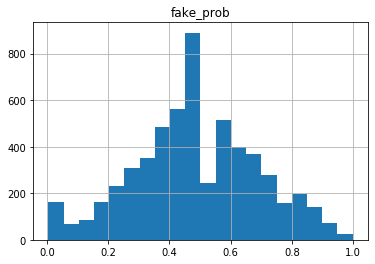

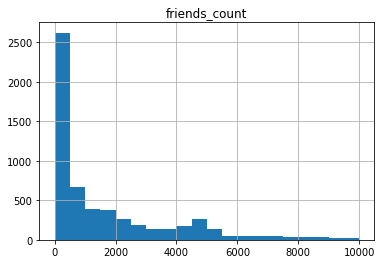

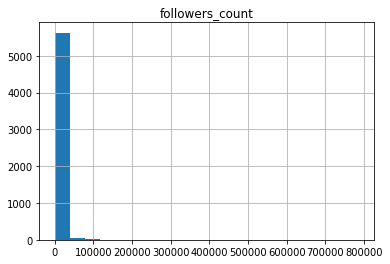

In [63]:
# df_feat.hist(column='fake_prob', bins=20)


df_final.hist(column='fake_prob', bins=20)

df_final.hist(column='friends_count', bins=20)

df_final.hist(column='followers_count', bins=20)

plt.show()

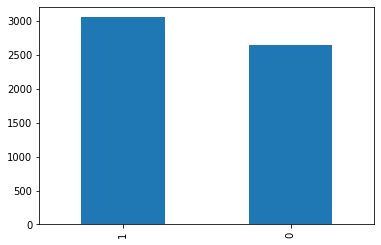

In [64]:
df_final["fake"].value_counts().plot.bar()
plt.show()

In [65]:
df_final["fake"].value_counts()

1    3055
0    2643
Name: fake, dtype: int64

In [66]:
# dat = pd.read_csv("datasets/verified.dat", 
#                  names=["uid", "name", "friends", "friends_count", 
#                         "followers_count", "listed_count", "statuses_count", 
#                         "created_at", "url", "avatar", "location"])

In [67]:
# filtered = df[df['uid'].isin(list(df_final['uid']))]
# filtered = dat[dat['uid'].isin(list(df_final['uid']))]

In [68]:
# filtered.info()

In [69]:
# filtered.to_csv('datasets/verified_3k.dat', header=False, index = False)